# Step 1: Split the dataset into training and testing sets

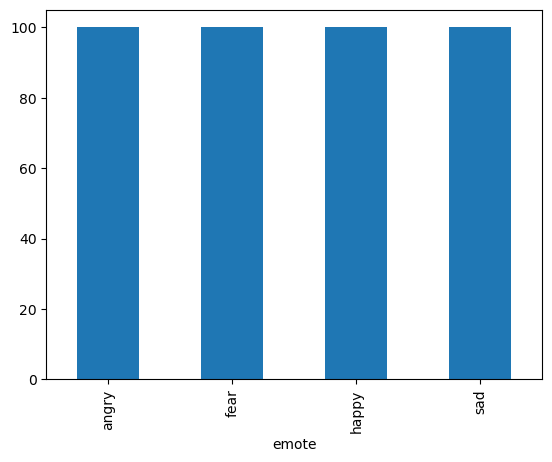

In [97]:
from sklearn.model_selection import train_test_split
import shutil
import os
import csv
import pandas as pd

emotions = ['angry', 'fear', 'happy', 'sad']
data_files = [[],[],[],[]]
for i, e in enumerate(emotions):
    path = './data_folder/' + e
    for root, dirs, files in os.walk(path):
        for file in files:
            data_files[i].append(root+'/'+file)

with open('annotated.csv', 'w', newline='') as f:
    field = ["emote", "path"]
    writer = csv.DictWriter(f, fieldnames=field)
    writer.writeheader()
    for i, e in enumerate(data_files):
        for file in e:
            row = {'emote': emotions[i], 'path': file}
            writer.writerow(row)

df = pd.read_csv('annotated.csv')
types = df.groupby('emote')['path'].count()
types.plot.bar(x='Emotion', y='Instances')

df_angry = df[df['emote'] == 'angry']
df_fear = df[df['emote'] == 'fear']
df_happy = df[df['emote'] == 'happy']
df_sad = df[df['emote'] == 'sad']
df_emotions = [df_angry, df_fear, df_happy, df_sad]

for e in df_emotions:
    df1 = e
    train, test = train_test_split(df, random_state=15, train_size=0.7)
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    for idx, i in train.iterrows():
        shutil.copy(i['path'], 'train/' + i['emote'])
    for idx, j in test.iterrows():
        shutil.copy(j['path'], 'test/' + j['emote'])


# Step 2: Exploratory Data Analysis (borrowed from sample code)

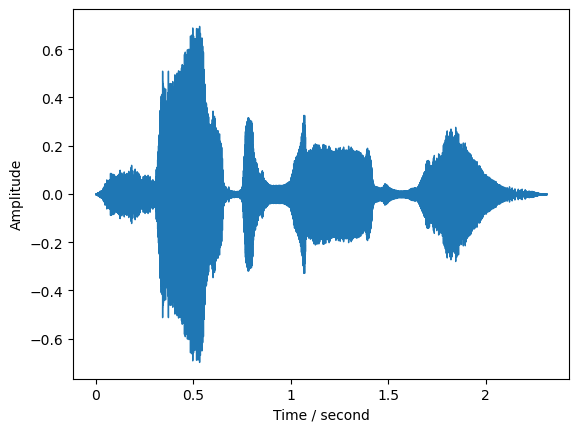

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from IPython.lib.display import Audio

df = pd.read_csv('annotated.csv')
ex = df.sample(n=1)
name = ex['emote'].values[0]
path = ex['path'].values[0]

signal, sample_rate = lb.load(path)

# plot audio files in time domain
plt.figure(1)
lb.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

Audio(data=signal, rate=sample_rate)


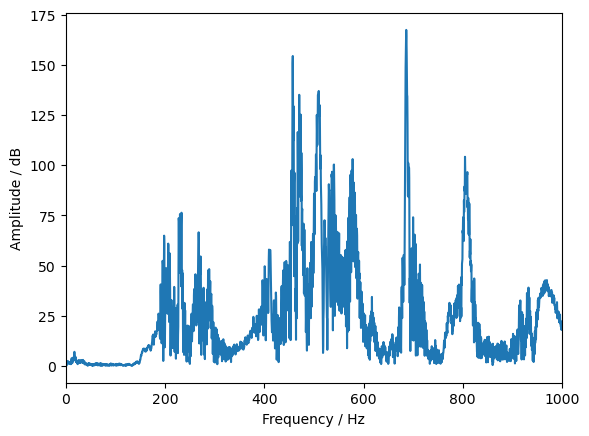

In [99]:
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

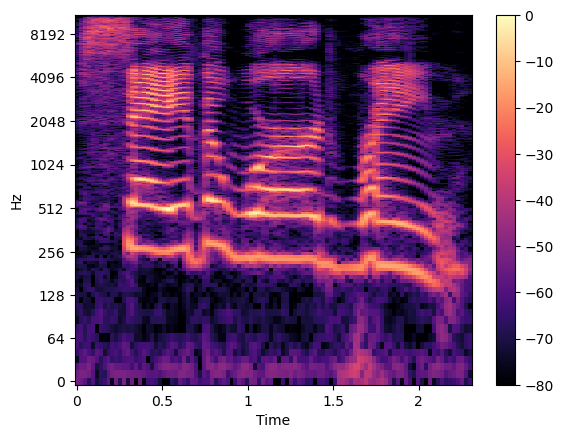

In [100]:
# plot the time-frequency variation of the audio
D = lb.stft(signal)  # STFT of y
S_db = lb.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(3)
lb.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
#
# audio feature extraction: loudness

[0.00121223 0.00416091 0.01003926 0.01598414 0.01909789 0.02002168
 0.02055383 0.02036983 0.02101725 0.02034285 0.01645053 0.01525991
 0.0145468  0.02876953 0.07443412 0.09340345 0.09003122 0.08910613
 0.08778852 0.08670627 0.08962068 0.09597784 0.10905175 0.1212603
 0.09606568 0.06168381 0.05206756 0.04614872 0.03111071 0.01080637
 0.00529009 0.00449906 0.01941664 0.05109313 0.06233267 0.04599494
 0.02771867 0.01991394 0.01394863 0.01119939 0.01114733 0.0115222
 0.01408886 0.02564111 0.04861275 0.06626591 0.07155175 0.05286277
 0.04930232 0.05091771 0.04950329 0.04873588 0.04797527 0.04781465
 0.04873156 0.04878077 0.04812082 0.04540277 0.04378981 0.04250409
 0.04314955 0.03010979 0.01249895 0.01003453 0.01046539 0.00858828
 0.00626458 0.00517179 0.00546445 0.0064493  0.00784425 0.01123525
 0.0222703  0.03536803 0.03945631 0.03829234 0.03778097 0.0410407
 0.04197561 0.04013183 0.03679839 0.03285672 0.02989928 0.02697214
 0.02361431 0.02060159 0.01757727 0.01506364 0.01286728 0.0101174

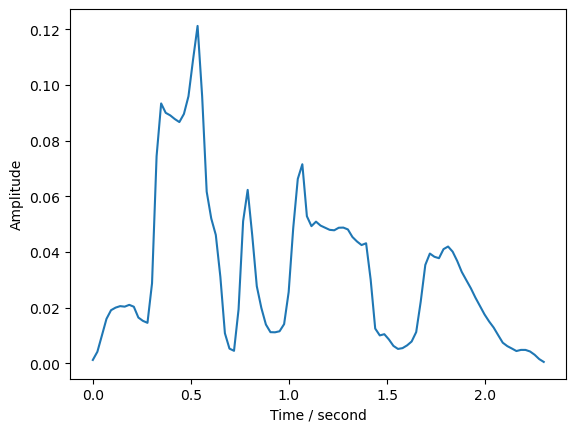

In [101]:
import pandas as pd

df_loudness = pd.DataFrame()
S, phase = lb.magphase(lb.stft(signal))
rms = lb.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
plt.figure(4)
times = lb.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()

# Step 3: Acoustic Feature Extraction

   Mel_Spectrogram)1  Mel_Spectrogram)2  Mel_Spectrogram)3  Mel_Spectrogram)4  \
0           0.000082           0.000446           0.001216           0.000420   
1           0.000059           0.000067           0.000046           0.000048   
2           0.000010           0.000014           0.000011           0.000019   
3           0.000008           0.000015           0.000013           0.000021   
4           0.000007           0.000015           0.000015           0.000016   

   Mel_Spectrogram)5  Mel_Spectrogram)6  Mel_Spectrogram)7  Mel_Spectrogram)8  \
0           0.000123           0.000230           0.000158           0.000065   
1           0.000068           0.000087           0.000081           0.000087   
2           0.000039           0.000060           0.000052           0.000035   
3           0.000050           0.000063           0.000052           0.000042   
4           0.000036           0.000061           0.000057           0.000059   

   Mel_Spectrogram)9  Mel_

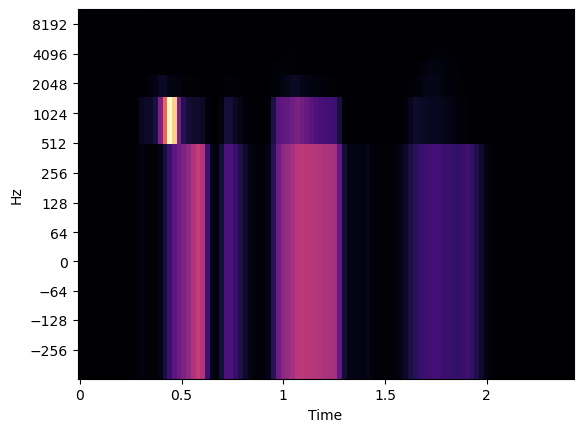

In [102]:
import librosa as lb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('annotated.csv')
ex = df.sample(n=1)
name = ex['emote'].values[0]
path = ex['path'].values[0]

signal, sample_rate = lb.load(path)

df_melspect = pd.DataFrame()
melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(melspect)):
    df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]
print(df_melspect.head(5))
plt.figure(8)
lb.display.specshow(melspect, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.652693  0.536878  1.000000  1.000000  0.661570  0.562745  0.956521   
1  0.558358  0.411743  0.619834  0.821507  0.951267  0.747202  1.000000   
2  0.453798  0.320595  0.219444  0.388607  1.000000  1.000000  0.946047   
3  0.476105  0.345668  0.194610  0.172375  0.357384  0.437104  0.500749   
4  0.709605  0.434691  0.136044  0.116396  0.177861  0.213855  0.448069   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.362081  0.201671   0.475199   0.599185   0.643774  
1  0.647890  0.459103   0.675007   0.942794   0.997809  
2  1.000000  1.000000   0.928323   1.000000   1.000000  
3  0.453928  0.785475   1.000000   0.873974   0.871658  
4  0.287525  0.295238   0.562753   0.588804   0.400358  


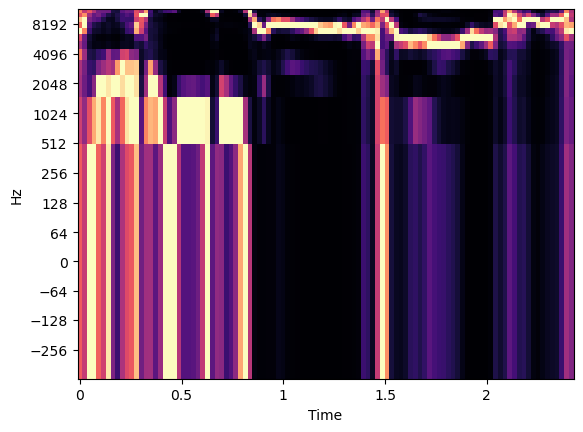

In [103]:
df_chroma = pd.DataFrame()
chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
lb.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -532.467712 -461.505280 -439.930542 -426.725372 -404.690094 -394.699463   
1   -8.326203  -51.183823  -83.460785  -95.906532  -98.496170  -95.017258   
2   38.146461   63.101265   89.941010   94.665939   80.861847   79.175240   
3   21.247084   24.544338   11.472971   -8.057303  -22.659828  -24.500942   
4    4.968219   10.686337   17.066061   16.433647   18.432055   23.996088   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -400.657043 -409.412933 -423.699890 -426.088226 -425.725494 -395.388184  
1 -101.640030 -109.366699 -107.731461 -105.376778 -107.693642  -88.801636  
2   75.141609   73.113144   77.983063   73.328964   72.985481   98.652611  
3  -24.721386  -30.170944  -23.353798  -20.532871  -17.007404   -2.638164  
4   19.672459   15.535906   20.704453   19.324318   19.720589   23.627058  


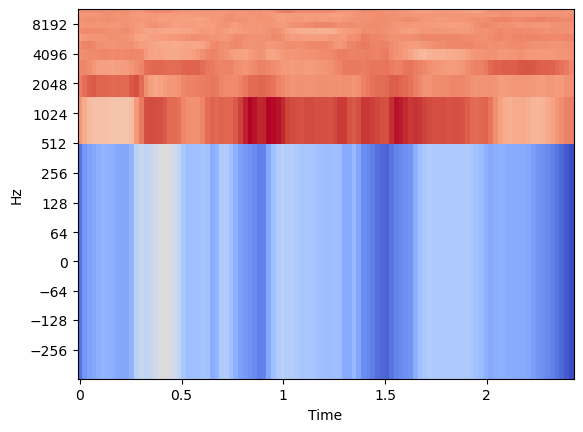

In [104]:
df_mfccs = pd.DataFrame()
mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
lb.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

# Step 4: Feature Post-processing

In [105]:
from tqdm import tqdm

train_path = 'train/'

emotions = []
features = []
for e in os.listdir(train_path):
    for wf in tqdm(os.listdir(train_path + e)):
        wf_path = f'train/{e}/{wf}'

        signal, sample_rate = lb.load(wf_path)

        df_melspect = pd.DataFrame()
        melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(melspect)):
            df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]

        df_chroma = pd.DataFrame()
        chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

        df_mfccs = pd.DataFrame()
        mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

        feature_matrix = pd.concat([df_melspect, df_chroma, df_mfccs])
        emotions.append(e)
        features.append(feature_matrix.values)

train_feature_vector = features
train_types_vector = types

100%|██████████| 73/73 [00:02<00:00, 25.64it/s]


In [106]:
test_path = 'test/'

emotions = []
features = []
for e in os.listdir(test_path):
    for wf in tqdm(os.listdir(test_path + e)):
        wf_path = f'test/{e}/{wf}'

        signal, sample_rate = lb.load(wf_path)

        df_melspect = pd.DataFrame()
        melspect = lb.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(melspect)):
            df_melspect['Mel_Spectrogram)%d'%(n_mel+1)] = melspect.T[n_mel]

        df_chroma = pd.DataFrame()
        chromagram = lb.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

        df_mfccs = pd.DataFrame()
        mfccs = lb.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

        feature_matrix = pd.concat([df_melspect, df_chroma, df_mfccs])
        emotions.append(e)
        features.append(feature_matrix.values)

test_feature_vector = features
test_types_vector = types

100%|██████████| 27/27 [00:01<00:00, 23.26it/s]


# Step 5: Build your audio emotion recognition model

In [106]:
from sklearn.preprocessing import StandardScaler

X_train = train_feature_vector
Y_train = train_types_vector

X_test = test_feature_vector
Y_test = test_types_vector

sc = StandardScaler()

X_train = np.asanyarray(X_train)
y_train = np.asanyarray(Y_train)
print(X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
print(X_train.shape)

X_train = sc.fit_transform(X_train)

# Test
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(Y_test)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_test.shape)

X_test = sc.transform(X_test)